In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
__author__ = 'Author'
__email__ = 'Email'

# Share Plots - Line Chart

This notebook serves as a helpful guide for generating visually appealing figures using popular Python plotting libraries. Whether you're a researcher, data scientist, or student, well-crafted bar charts are essential for presenting data in a clear and impactful manner. In this notebook, you will find easy-to-follow code examples and step-by-step instructions to create various types of charts, including:
1. Grouped bar chart with labels¶

## Initialization

In [2]:
# built-in

# public
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})
colors = [plt.cm.Paired(i) for i in range(20)]

%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

---
## 1. Paired line charts with variances

In [19]:
# init
label_list = ['9/1', '8/2', '7/3', '6/4', '5/5', '4/6', '3/7', '2/8', '1/9']
ori_quora_ibleu_list = [17.56, 17.75, 17.99, 18.11, 18.23, 18.30, 18.40, 18.31, 18.36]
ori_quora_ibleu_std_list = [0.14, 0.34, 0.19, 0.19, 0.07, 0.23, 0.08, 0.14, 0.11]
ori_quora_bleu_list = [33.81, 33.62, 33.48, 33.70, 33.50, 33.87, 33.76, 33.89, 33.65]
ori_quora_bleu_std_list = [0.22, 0.11, 0.20, 0.27, 0.09, 0.21, 0.25, 0.50, 0.40]
sep_quora_ibleu_list = [14.72, 14.90, 15.18, 15.39, 15.31, 15.36, 15.35, 15.43, 15.44]
sep_quora_bleu_list = [29.42, 29.55, 29.77, 30.03, 29.94, 29.84, 29.72, 29.74, 29.80]
twitter_ibleu_list = [24.55, 25.16, 25.09, 25.34, 25.48, 25.77, 25.81, 25.91, 25.73]
twitter_bleu_list = [41.25, 41.77, 42.05, 42.42, 42.25, 42.72, 42.90, 42.62, 42.70]

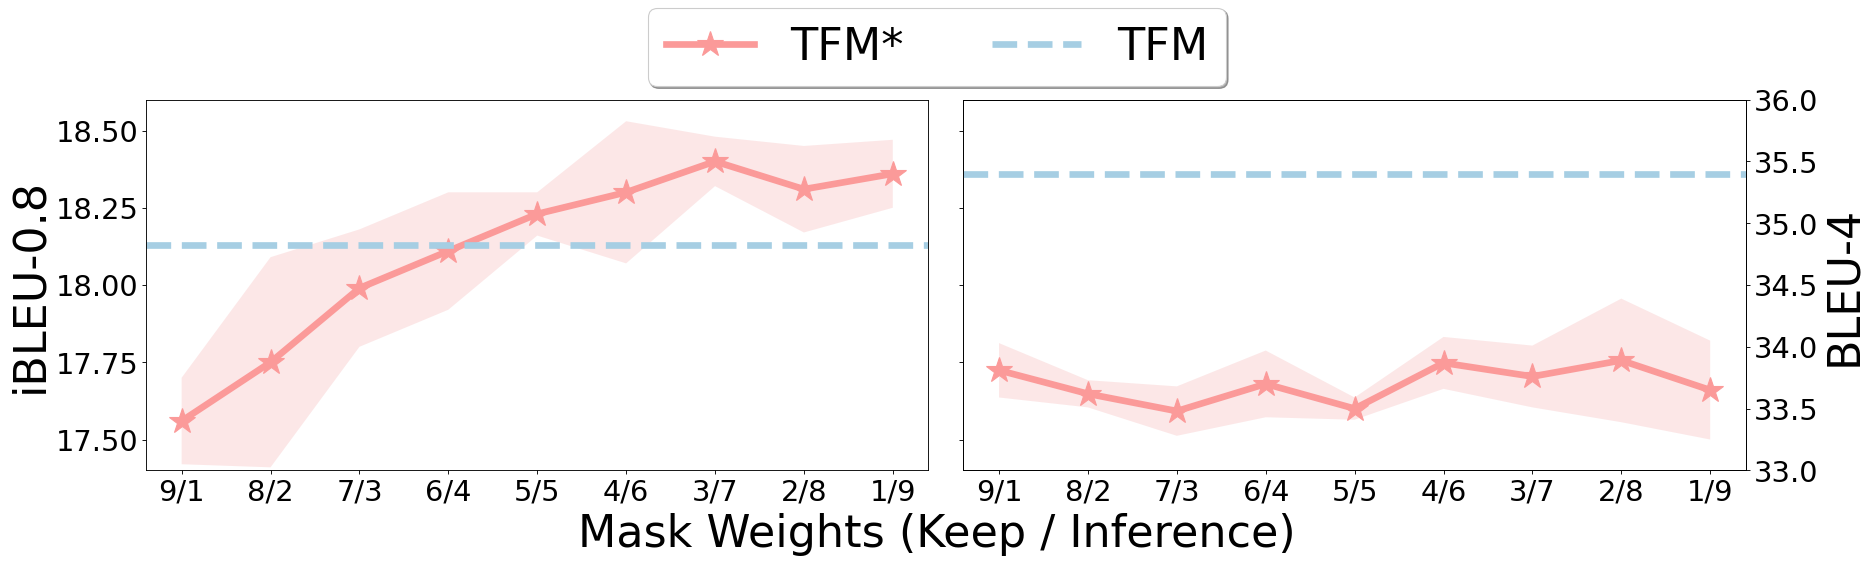

In [30]:
fig, (ax_left, ax_right) = plt.subplots(1, 2, sharey=True, figsize=(24, 6), dpi=80)
colors = [plt.cm.Paired(i) for i in range(20)]

ax_left.plot(
    ori_quora_ibleu_list
    , marker='*'
    , label='TFM*'
    , markersize=24
    , color=colors[4]
    , linewidth='6'
)

ax_left.fill_between(
    range(len(ori_quora_ibleu_list))
    , np.array(ori_quora_ibleu_list)-np.array(ori_quora_ibleu_std_list)
    , np.array(ori_quora_ibleu_list)+np.array(ori_quora_ibleu_std_list)
    ,alpha=0.1
    , facecolor=colors[5]
)


ax_left.axhline(
    y=18.13
    , color=colors[0]
    , linestyle='dashed'
    , linewidth='6'
    , label='TFM'
)

ax_left.set_ylim([17.4, 18.6])
ax_left.set_xticks(range(len(label_list)))
ax_left.set_xticklabels(label_list)
ax_left.set_ylabel('iBLEU-0.8', fontsize=40)

ax1_right = ax_right.twinx()
ax1_right.plot(
    ori_quora_bleu_list
    , marker='*'
    , markersize=24
    , color=colors[4]
    , linewidth='6'
)

ax1_right.fill_between(
    range(len(ori_quora_bleu_list))
    , np.array(ori_quora_bleu_list)-np.array(ori_quora_bleu_std_list)
    , np.array(ori_quora_bleu_list)+np.array(ori_quora_bleu_std_list)
    ,alpha=0.1
    , facecolor=colors[5]
)

ax1_right.axhline(
    y=35.40
    , color=colors[0]
    , linestyle='dashed'
    , linewidth='6'
)

ax1_right.set_ylim([33, 36])
ax1_right.set_xticks(range(len(label_list)))
ax1_right.set_xticklabels(label_list, fontsize=26)
ax1_right.set_ylabel('BLEU-4', fontsize=40)

handles, labels = [(a+b) for a, b in zip(ax_left.get_legend_handles_labels(), ax1_right.get_legend_handles_labels())]
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fancybox=True, shadow=True, fontsize=40)
fig.text(0.5, -0.02, 'Mask Weights (Keep / Inference)', ha='center', fontsize=40)
plt.tight_layout()
plt.show()